## **MODELOS DE CLASIFICACIÓN**

En el presente notebook contiene algunos de los algoritmos más destacados en el aprendizaje supervisado, con la intención de ser una pequeña guía para el estudiante de ciencia de datos.

## **REGRESION LOGISTICA**

### ¿Qué es la regresión logística?

La **regresión logística** es un modelo de aprendizaje supervisado utilizado para problemas de **clasificación binaria o multinomial**, es decir, cuando la variable objetivo tiene dos o más categorías discretas. A diferencia de la regresión lineal, que predice valores continuos, la regresión logística estima la **probabilidad** de pertenencia a una clase mediante la función sigmoide (o softmax en caso multinomial), que transforma los valores en un rango de 0 a 1.

### ¿Cuándo usar la regresión logística?

Se debe usar cuando:  
1. **Clasificación binaria:** Para problemas con dos clases (ejemplo: spam/no spam, aprobado/reprobado).  
2. **Clasificación multinomial (regresión logística multinomial):** Si hay más de dos clases (ejemplo: tipos de enfermedades).  
3. **Predicción de probabilidades:** Si se requiere conocer la probabilidad de ocurrencia de un evento.  
4. **Relación lineal entre las variables independientes y el logaritmo de las probabilidades.**  
5. **Interpretabilidad:** Cuando se desea entender el impacto de cada variable en la probabilidad de clasificación.  
6. **Cuando los datos están balanceados o con leves desbalances.**  

**Casos de uso comunes:**  
- Diagnóstico médico (enfermo/no enfermo).  
- Análisis de riesgos crediticios.  
- Predicción de abandono de clientes (churn).  
- Clasificación de correos electrónicos (spam/no spam).  

---

### ¿Cuándo NO usarla?

- Si los datos no tienen una relación aproximadamente lineal en términos logarítmicos.  
- Si el problema requiere modelar relaciones complejas (puede ser mejor usar árboles de decisión o redes neuronales).  
- Si hay un alto número de características irrelevantes o ruido, ya que la regresión logística es sensible a ellos.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Incializamos el modelo usando parametros default
logreg = LogisticRegression(random_state=16)

# Entrenamos el modelo con los datos
logreg.fit(X_train, y_train)

# Probamos el modelo
y_pred = logreg.predict(X_test)
y_pred

**Matriz de confusión**

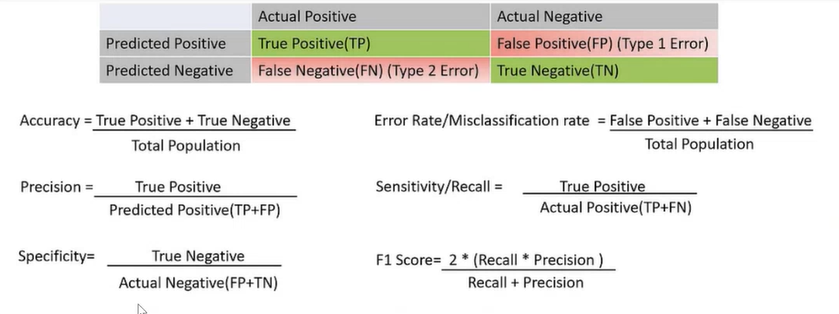

In [ ]:
# Generamos la matriz de confusión a partir de los datos de prueba de Y y de los datos de predicción de Y
matrix = confusion_matrix(y_test, prediccion)
matrix

# **Curva ROC**

### ¿Qué es la curva ROC?

La **curva ROC** (Receiver Operating Characteristic) es una herramienta para evaluar el rendimiento de un modelo de clasificación binaria. Representa la relación entre dos métricas:  
- **Tasa de verdaderos positivos (TPR)**: La proporción de casos positivos correctamente identificados.  
- **Tasa de falsos positivos (FPR)**: La proporción de casos negativos incorrectamente clasificados como positivos.

### ¿Cómo se interpreta la curva ROC?
- **Curva ideal**: Se acerca a la esquina superior izquierda, con **TPR** cercano a 1 y **FPR** cercano a 0.
- **AUC (Área Bajo la Curva)**: Mide el rendimiento general del modelo.  
  - AUC cercano a **1** = buen modelo.
  - AUC cercano a **0.5** = modelo aleatorio.
  - AUC cercano a **0** = modelo peor que aleatorio.

### ¿Cuándo usarla?
- Para evaluar modelos de clasificación binaria.
- Para comparar diferentes modelos y umbrales de decisión.
- En problemas con datos desbalanceados donde otras métricas como precisión pueden ser engañosas.


In [ ]:
#Grafica de la Curva de ROC
nombres_clases=[0,1] # Nombre de las clases
fig, ax = plt.subplots()

tick_marks = np.arange(len(nombres_clases))
plt.xticks(tick_marks, nombres_clases)
plt.yticks(tick_marks, nombres_clases)

# Creación del mapa de calor
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiquieta predecida')

In [ ]:
# Establecemos la probabilidad de predicción
y_pred_proba = logreg.predict_proba(X_test)[::,1]

# Construimos los valores de la curva
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# Generamos el valor del área bajo la curva
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Construimos la gráfica
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#Reporte de eficiencia
print(classification_report(y_test, y_pred))

# **F1 SCORE**

### ¿Qué es el F1 Score?

El **F1 Score** es una métrica que combina la **precisión** y el **recall** de un modelo de clasificación, usando la **media armónica** de ambas. Es útil cuando las clases están desbalanceadas.

#### Fórmula:
\[
F1 = 2 \times \frac{Precisión \times Recall}{Precisión + Recall}
\]

- **Precisión**: Proporción de predicciones positivas correctas.
- **Recall**: Proporción de casos positivos correctamente identificados.

#### ¿Cuándo usarlo?
- En **clasificación desbalanceada**.
- Cuando se necesita un balance entre **precisión** y **recall**.

#### Interpretación:
- **F1 = 1**: Modelo perfecto (alta precisión y recall).
- **F1 = 0**: Modelo inefectivo.


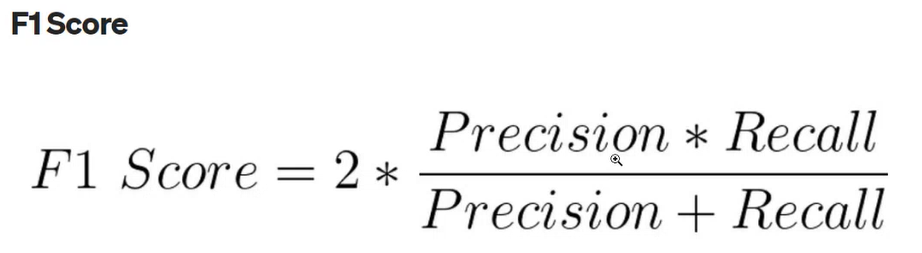

In [ ]:
#F1 SCORE
f1score = f1_score(y_test, y_pred)

## **MAQUINA DE SOPORTE VECTORIAL SVM**

### ¿Qué es SVM (Support Vector Machine)?

**SVM** es un algoritmo de **clasificación supervisada** utilizado para encontrar el mejor **hiperplano** que separa las clases en un espacio de características. Su objetivo es maximizar el margen entre las clases, es decir, la distancia entre el hiperplano y los puntos más cercanos de cada clase, llamados **vectores de soporte**.

#### Características principales:
- **Clasificación lineal**: SVM busca un hiperplano lineal en casos donde los datos son linealmente separables.
- **Clasificación no lineal**: Usando un truco de **kernel**, SVM puede manejar casos no lineales transformando los datos a un espacio de mayor dimensión.
- **Manejo de desbalance de clases**: SVM es efectivo incluso con clases desbalanceadas.

#### ¿Cuándo usarlo?
- En problemas de **clasificación binaria**.
- Cuando los datos son **altamente dimensionales** o no lineales.
- Para **datos pequeños o medianos** donde la exactitud es crucial.



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SVM con hiperparámetros ajustados
age_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
age_classifier.fit(X_train, y_train)

# Predecir valores sobre el conjunto de prueba
prediction = age_classifier.predict(X_test)

# Evaluación del modelo
print("Train Accuracy:", accuracy_score(y_train, age_classifier.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, prediction))
print("\nClassification Report:\n", classification_report(y_test, prediction))

# Convertir predicciones a DataFrame
agePrediction = pd.DataFrame(data=prediction, index=X_test.index.values, columns=['Age'])

# Llenar valores nulos de train_set con predicciones
train_set = train_set.combine_first(agePrediction)

* kernel='rbf': Kernel de función radial para manejar datos no lineales.
* C=1.0: Controla el margen de separación, valores más altos reducen el margen pero pueden sobreajustar.
* gamma='scale': Ajusta automáticamente la influencia de cada punto de entrenamiento.
* random_state=42: Para resultados reproducibles.

In [ ]:
# Importación de la clasificación de vectores de soporte  de scikit-learn
from sklearn.svm import SVC
# Declarar el SVC sin sintonizar
classifier = SVC()
# Ajustando los datos. Aquí es donde el SVM aprenderá
classifier.fit(X_train, Y_train)
# Predecir el resultado y dar la precisión
score = classifier.score(x_test, y_test)
print(score)

## **KNN (VECINOS MAS CERCANOS)**

### ¿Qué es KNN (K-Nearest Neighbors)?

**KNN** es un algoritmo de **clasificación** y **regresión** supervisada. Clasifica una nueva instancia según la clase más común de sus **K vecinos más cercanos** en el espacio de características.

#### Características principales:
- **Sin modelo explícito**: KNN no construye un modelo durante el entrenamiento, simplemente almacena los datos de entrenamiento.
- **Clasificación basada en la distancia**: Utiliza métricas como la **distancia euclidiana** para medir la cercanía entre puntos.
- **Valor de K**: El número de vecinos que se toman en cuenta, el cual debe ser especificado antes de entrenar el modelo.

#### ¿Cuándo usarlo?
- En problemas de **clasificación o regresión** cuando los datos son **relativamente simples** y **bien distribuidos**.
- Para **pequeños conjuntos de datos**.
- Cuando se dispone de un **número bajo de dimensiones** y no hay mucha necesidad de optimización.



In [ ]:
# Importación de librerías necesarias
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Generación de datos de muestra para clasificación
X, y = make_classification(n_samples=300,  # Número de muestras
                           n_features=2,   # Número de características (2 para fácil visualización)
                           n_redundant=0,  # Sin características redundantes
                           n_clusters_per_class=1,
                           random_state=0)

# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Visualización de los datos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=30)
plt.title("Datos de Entrenamiento")
plt.show()

# Implementación de KNN
knn = KNeighborsClassifier(n_neighbors=5,    # Número de vecinos a considerar
                           metric='minkowski',  # Métrica de distancia, por defecto es la distancia Euclidiana
                           p=2)  # Parámetro p=2 para la distancia Euclidiana en la métrica Minkowski

# Entrenamiento del modelo
knn.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluación del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualización de las predicciones
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', marker='o', label="Predicción")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', alpha=0.5, label="Verdadero")
plt.tit

# **ARBOL DE DECISIÓN**

### ¿Qué es un Árbol de Decisión?

Un **Árbol de Decisión** es un algoritmo de **clasificación** y **regresión** que divide los datos en **ramas** para tomar decisiones basadas en **preguntas** sobre las características. Cada nodo del árbol representa una pregunta sobre una característica, y las ramas representan las respuestas posibles.

#### Características principales:
- **Fácil de interpretar**: Los árboles de decisión son fáciles de entender y visualizar.
- **No requiere normalización**: No es necesario escalar los datos antes de usar un árbol de decisión.
- **Corte de decisiones**: El árbol divide el espacio de características en subconjuntos basados en reglas simples.

#### ¿Cuándo usarlo?
- En problemas de **clasificación** o **regresión** con datos no lineales.
- Cuando la **interpretabilidad** del modelo es importante.
- En problemas donde las **relaciones no lineales** entre las variables no son tan complejas.



In [ ]:
# Importar librerías necesarias
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# Crear una instancia del clasificador de árbol de decisión
# criterion='entropy': Mide la calidad de la división utilizando la entropía (puede ser 'gini')
# max_depth=2: Define la profundidad máxima del árbol para evitar sobreajuste
arbol_decision = DecisionTreeClassifier(criterion='entropy', max_depth=2)

# Entrenar el modelo con los datos de entrenamiento (X_train, y_train)
arbol = arbol_decision.fit(X_train, y_train)

# Evaluar la precisión del clasificador en el conjunto de prueba (X_test, y_test)
# Devuelve la proporción de predicciones correctas sobre el total
accuracy = arbol_decision.score(X_test, y_test)
print(f"Precisión del modelo: {accuracy:.2f}")

# Imprimir la estructura del árbol de decisión en formato de texto
# feature_names: Lista de nombres de las columnas usadas en el entrenamiento
print(export_text(arbol, feature_names=["Columna", "Columna2"]))

# Graficar el árbol de decisión
# feature_names: Etiquetas de las características utilizadas para entrenar el modelo
# filled=True: Colorea los nodos según la clase predominante para mejor visualización
plt.figure(figsize=(10, 6))
plot_tree(arbol, feature_names=["Columna", "Columna2"], filled=True, rounded=True, class_names=True)
plt.title("Árbol de Decisión")
plt.show()

In [ ]:
#Clasificar un nuevo paciente
print("Nuevo paciente", arbol_decision_predict([[70, 150]]))

# **BOSQUE ALEATORIO**

### ¿Qué es el Bosque Aleatorio (Random Forest)?

El **Bosque Aleatorio** es un algoritmo de **clasificación** y **regresión** que utiliza múltiples **árboles de decisión** para hacer predicciones. Cada árbol se entrena con un subconjunto aleatorio de los datos y las predicciones se combinan por **votación** (para clasificación) o **promedio** (para regresión).

#### Características principales:
- **Ensemble learning**: Random Forest es un método de **aprendizaje conjunto** que mejora la precisión y reduce el sobreajuste (overfitting).
- **Robustez**: Funciona bien incluso con datos faltantes y desbalanceados.
- **No requiere normalización**: Al igual que los árboles de decisión, no es necesario escalar los datos.

#### ¿Cuándo usarlo?
- En problemas de **clasificación** o **regresión** con datos grandes y complejos.
- Cuando se necesita un modelo **robusto** y **preciso**.
- En tareas con **datos desbalanceados**.



In [ ]:
# Importación de librerías necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una instancia del modelo Random Forest
# n_estimators=100: Número de árboles en el bosque
# max_depth=None: Los árboles crecerán hasta que todas las hojas sean puras o contengan menos muestras que min_samples_split
# random_state=16: Semilla para garantizar reproducibilidad
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=16)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular la precisión del modelo comparando predicciones con valores reales
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.2f}")

# Mostrar un informe de clasificación detallado
# Incluye métricas como precisión, recall y F1-score para cada clase
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# Generar y visualizar la matriz de confusión
# Permite observar cuántas predicciones correctas e incorrectas se realizaron
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

Evaluación

In [ ]:
# Exactitud
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")

# Matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

# Reporte de clasificación
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(class_report_rf)